In [47]:
import pandas as pd
import numpy as np
full_df = pd.read_csv(open('xxx', 'r'), sep='\t')

In [48]:
full_df = full_df.dropna().reset_index()[full_df.columns[3:]]

In [49]:
full_df.UNIQUE_IDENTIFIER.value_counts()

0    9111
1     802
Name: UNIQUE_IDENTIFIER, dtype: int64

In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

test = []
train = []
cv = KFold(n_splits=3, random_state=42, shuffle=False)
for train_index, test_index in cv.split(full_df):

    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    train.append(train_index)
    test.append(test_index)
    # Class count
    count_class_0, count_class_1 = full_df.UNIQUE_IDENTIFIER[train_index].value_counts()

    # Divide by class
    full_df_0 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 0]
    full_df_1 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 1]

#     df_class_1_over = full_df_1.sample(count_class_0, replace=True)
#     df_train_over = pd.concat([full_df_0, df_class_1_over], axis=0)

    df_class_0_over = full_df_0.sample(3*count_class_1, replace=True)
    df_train_over = pd.concat([full_df_1, df_class_0_over], axis=0)
    

    print('Random over-sampling:')
    print(df_train_over.UNIQUE_IDENTIFIER.value_counts())
    
    X_train,y_train = df_train_over.text,df_train_over[df_train_over.columns[5:6]]
    X_test,y_test = full_df.iloc[test_index].text,full_df.iloc[test_index][full_df.columns[5:6]]

    vectorizer = TfidfVectorizer(min_df=0.05,max_df=0.5,  max_features=30000, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(2, 3), use_idf=1,smooth_idf=1,
            stop_words = 'english')

    x_train =  vectorizer.fit_transform(X_train)
    x_test = vectorizer.transform(X_test)
    
    log = LogisticRegression()
    svm_m = svm.LinearSVC(random_state=12, tol=1e-5)
    nb = MultinomialNB()
    labels = ['1', '0']
    log.fit(x_train, y_train['UNIQUE_IDENTIFIER'])
    svm_m.fit(x_train, y_train['UNIQUE_IDENTIFIER'])
    nb.fit(x_train, y_train['UNIQUE_IDENTIFIER'])
    # calculating test accuracy
    prediction_log = log.predict(x_test)
    prediction_svm = svm_m.predict(x_test)
    prediction_nb = nb.predict(x_test)
    
    cm_log = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_log)
    print(cm_log)
    cm_svm = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_svm)
    print(cm_svm)
    cm_nb = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_nb)
    print(cm_nb)

    print('log')
    print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_log, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))
    print('svm')
    print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_svm, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))
    print('nb')
    print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_nb, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))
    print("\n")
    

Train Index:  [3305 3306 3307 ..., 9910 9911 9912] 

Test Index:  [   0    1    2 ..., 3302 3303 3304]
Random over-sampling:
0    1800
1     600
Name: UNIQUE_IDENTIFIER, dtype: int64


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[[3091   12]
 [ 183   19]]
[[2938  165]
 [ 166   36]]
[[3089   14]
 [ 201    1]]
log
             precision    recall  f1-score   support

   NEGATIVE       0.94      1.00      0.97      3103
   POSITIVE       0.61      0.09      0.16       202

avg / total       0.92      0.94      0.92      3305

svm
             precision    recall  f1-score   support

   NEGATIVE       0.95      0.95      0.95      3103
   POSITIVE       0.18      0.18      0.18       202

avg / total       0.90      0.90      0.90      3305

nb
             precision    recall  f1-score   support

   NEGATIVE       0.94      1.00      0.97      3103
   POSITIVE       0.07      0.00      0.01       202

avg / total       0.89      0.93      0.91      3305



Train Index:  [   0    1    2 ..., 9910 9911 9912] 

Test Index:  [3305 3306 3307 ..., 6606 6607 6608]
Random over-sampling:
0    1563
1     521
Name: UNIQUE_IDENTIFIER, dtype: int64


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[[2991   32]
 [ 248   33]]
[[2790  233]
 [ 170  111]]
[[3004   19]
 [ 277    4]]
log
             precision    recall  f1-score   support

   NEGATIVE       0.92      0.99      0.96      3023
   POSITIVE       0.51      0.12      0.19       281

avg / total       0.89      0.92      0.89      3304

svm
             precision    recall  f1-score   support

   NEGATIVE       0.94      0.92      0.93      3023
   POSITIVE       0.32      0.40      0.36       281

avg / total       0.89      0.88      0.88      3304

nb
             precision    recall  f1-score   support

   NEGATIVE       0.92      0.99      0.95      3023
   POSITIVE       0.17      0.01      0.03       281

avg / total       0.85      0.91      0.87      3304



Train Index:  [   0    1    2 ..., 6606 6607 6608] 

Test Index:  [6609 6610 6611 ..., 9910 9911 9912]
Random over-sampling:
0    1449
1     483
Name: UNIQUE_IDENTIFIER, dtype: int64


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[[2899   86]
 [ 280   39]]
[[2735  250]
 [ 134  185]]
[[2450  535]
 [ 243   76]]
log
             precision    recall  f1-score   support

   NEGATIVE       0.91      0.97      0.94      2985
   POSITIVE       0.31      0.12      0.18       319

avg / total       0.85      0.89      0.87      3304

svm
             precision    recall  f1-score   support

   NEGATIVE       0.95      0.92      0.93      2985
   POSITIVE       0.43      0.58      0.49       319

avg / total       0.90      0.88      0.89      3304

nb
             precision    recall  f1-score   support

   NEGATIVE       0.91      0.82      0.86      2985
   POSITIVE       0.12      0.24      0.16       319

avg / total       0.83      0.76      0.80      3304





In [ ]:
test_index = test[2]
train_index = train[2]
count_class_0, count_class_1 = full_df.UNIQUE_IDENTIFIER[train_index].value_counts()

# Divide by class
full_df_0 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 0]
full_df_1 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 1]

df_class_1_over = full_df_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([full_df_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.UNIQUE_IDENTIFIER.value_counts())

X_train,y_train = df_train_over.text,df_train_over[df_train_over.columns[5:6]]
X_test,y_test = full_df.iloc[test_index].text,full_df.iloc[test_index][full_df.columns[5:6]]

vectorizer = TfidfVectorizer(min_df=0.025,max_df=0.7,  max_features=30000, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(2, 4), use_idf=1,smooth_idf=1,
        stop_words = 'english')

x_train =  vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)

log = LogisticRegression()

log.fit(x_train, y_train['UNIQUE_IDENTIFIER'])

# calculating test accuracy
prediction_log = log.predict(x_test)

cm_log = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_log)
print(cm_log)


print('log')
print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_log, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))


In [150]:
false_negative = X_test[(y_test['UNIQUE_IDENTIFIER'] == 1) & (prediction_log == 0)]
false_postive = X_test[(y_test['UNIQUE_IDENTIFIER'] == 0) & (prediction_log == 1)]
true_postive = X_test[(y_test['UNIQUE_IDENTIFIER'] == 1) & (prediction_log == 1)]
true_negative = X_test[(y_test['UNIQUE_IDENTIFIER'] == 0) & (prediction_log == 0)]

In [155]:
' '.join(false_postive)

'changes to the privacy policy super lucky reserves the right to change modify add or remove portions of this privacy policy at any time for example to reflect updates to the service or to reflect changes in the law if we make a material change to the privacy policy we will provide you with appropriate notice and will seek your consent to the updated privacy policy in accordance with applicable legal requirements please check this privacy policy periodically for those changes your continued use of the service after the posting of changes constitutes your binding acceptance of such changes information we collect from you super lucky collects information about you through the means discussed below when we provide the service use of account we also request and collect your information when you administer or personalize your account after registration or otherwise interact with the service for example we collect your information both when you enter promotions on or in connection with the s

In [147]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

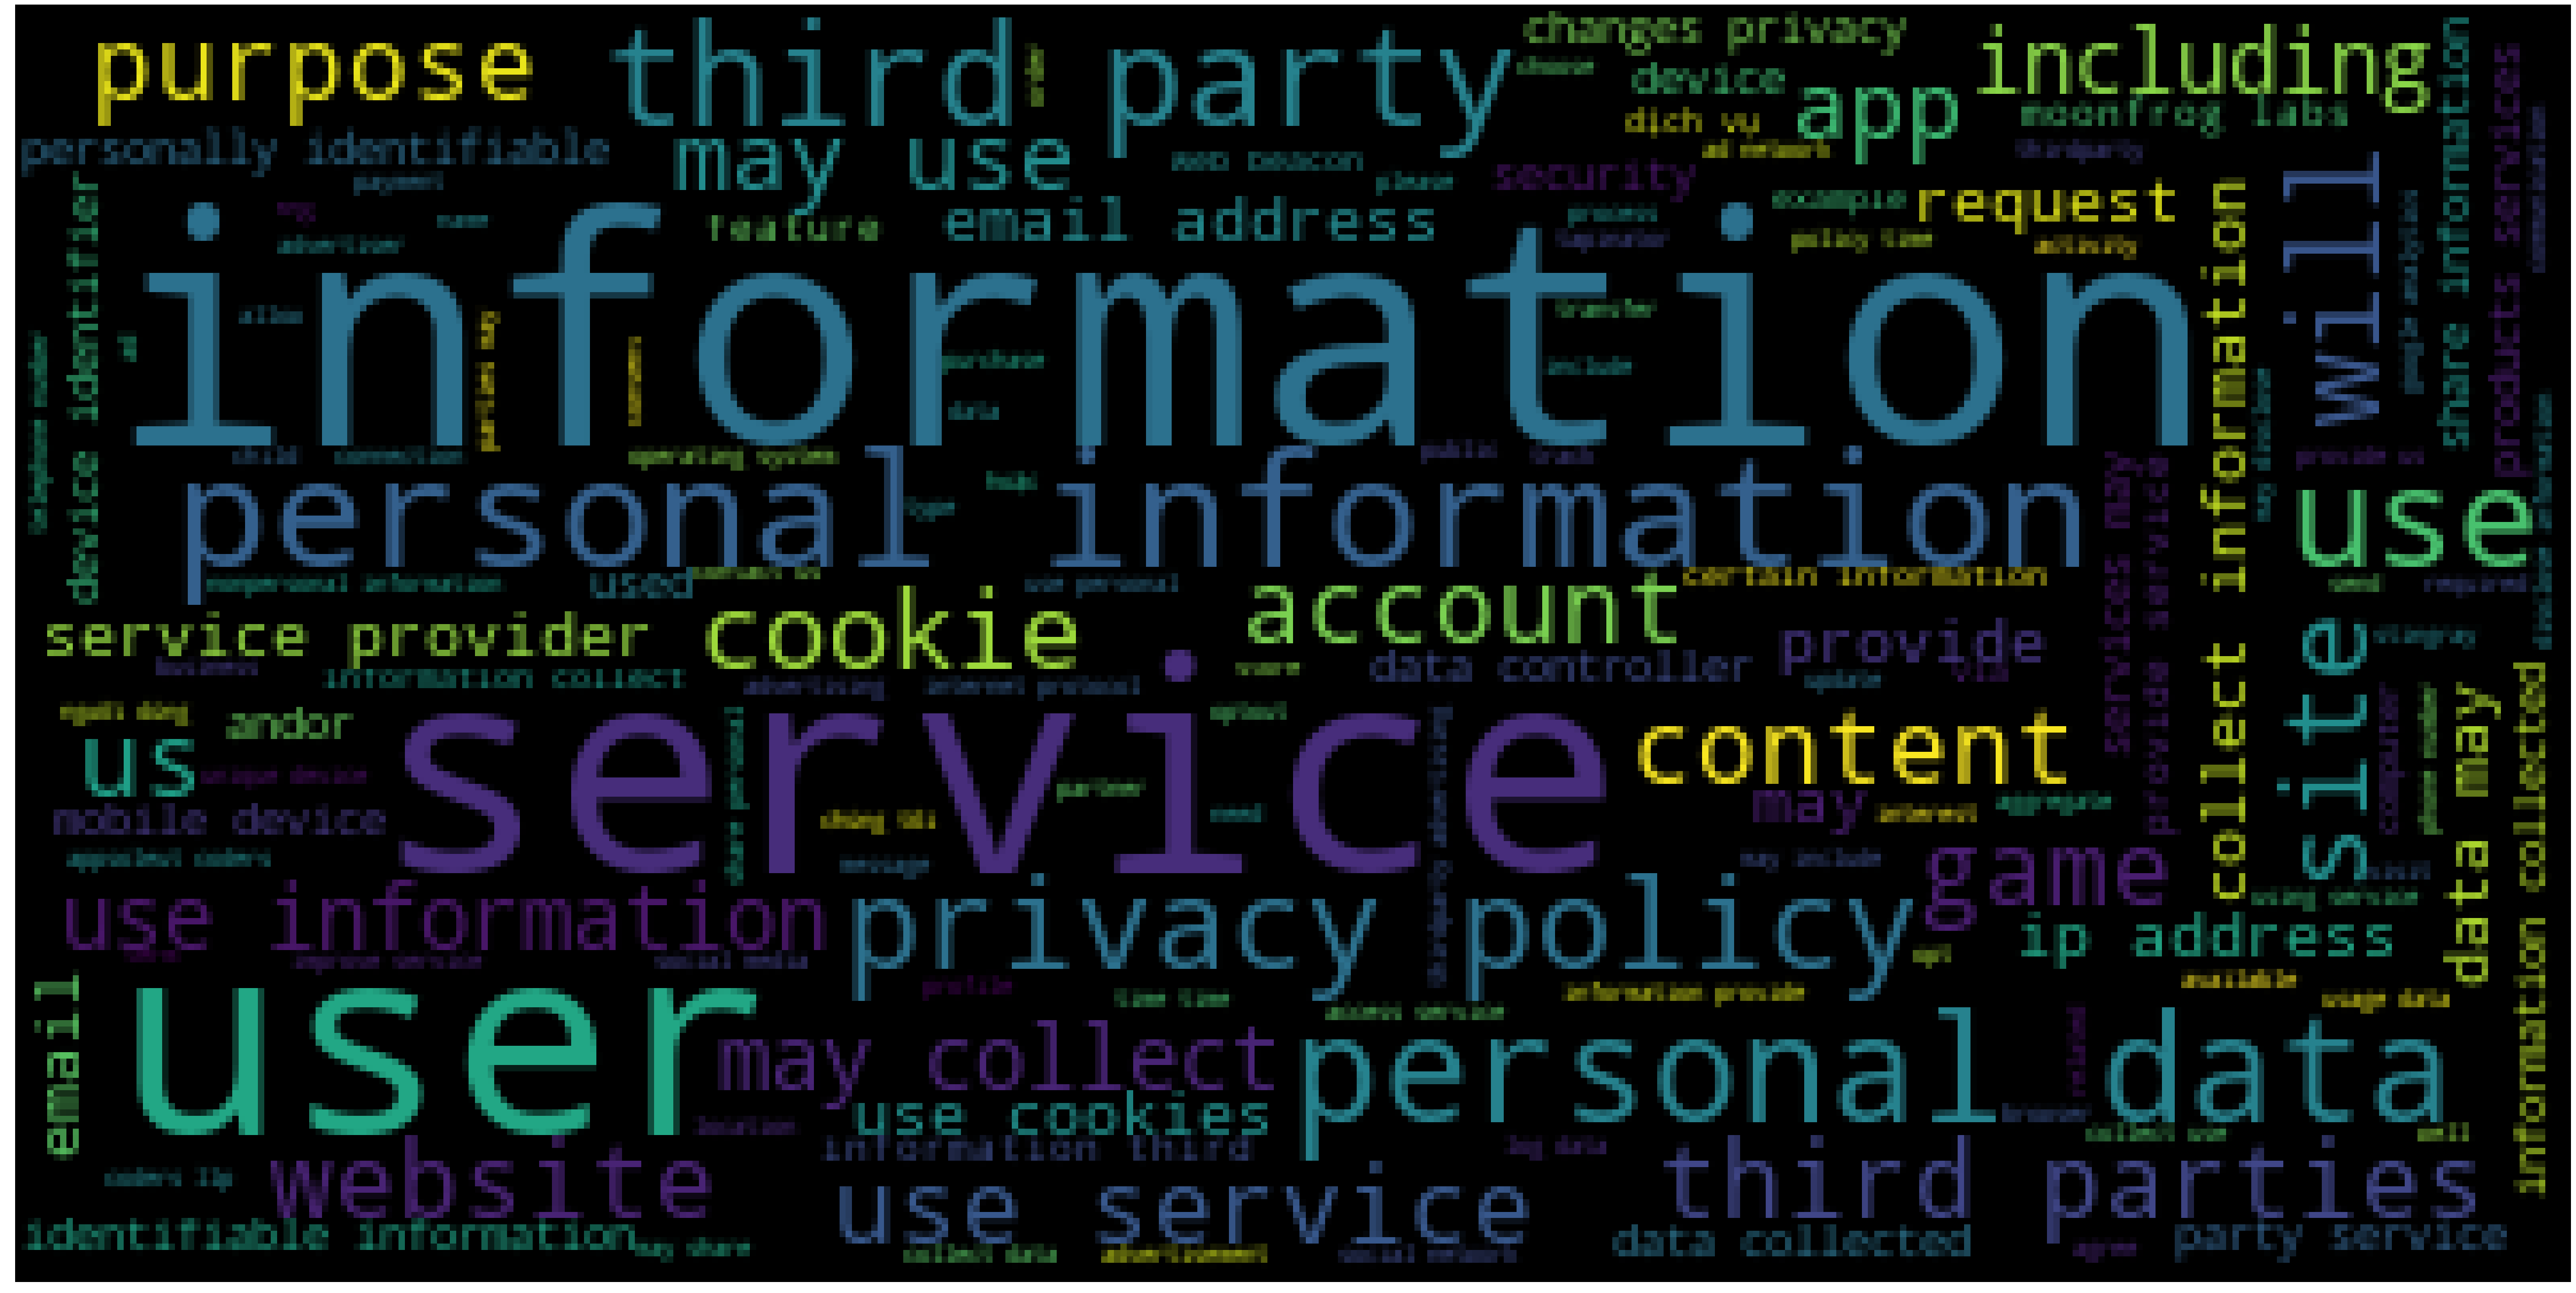

In [148]:
wc(false_negative,'black','Common Words' )

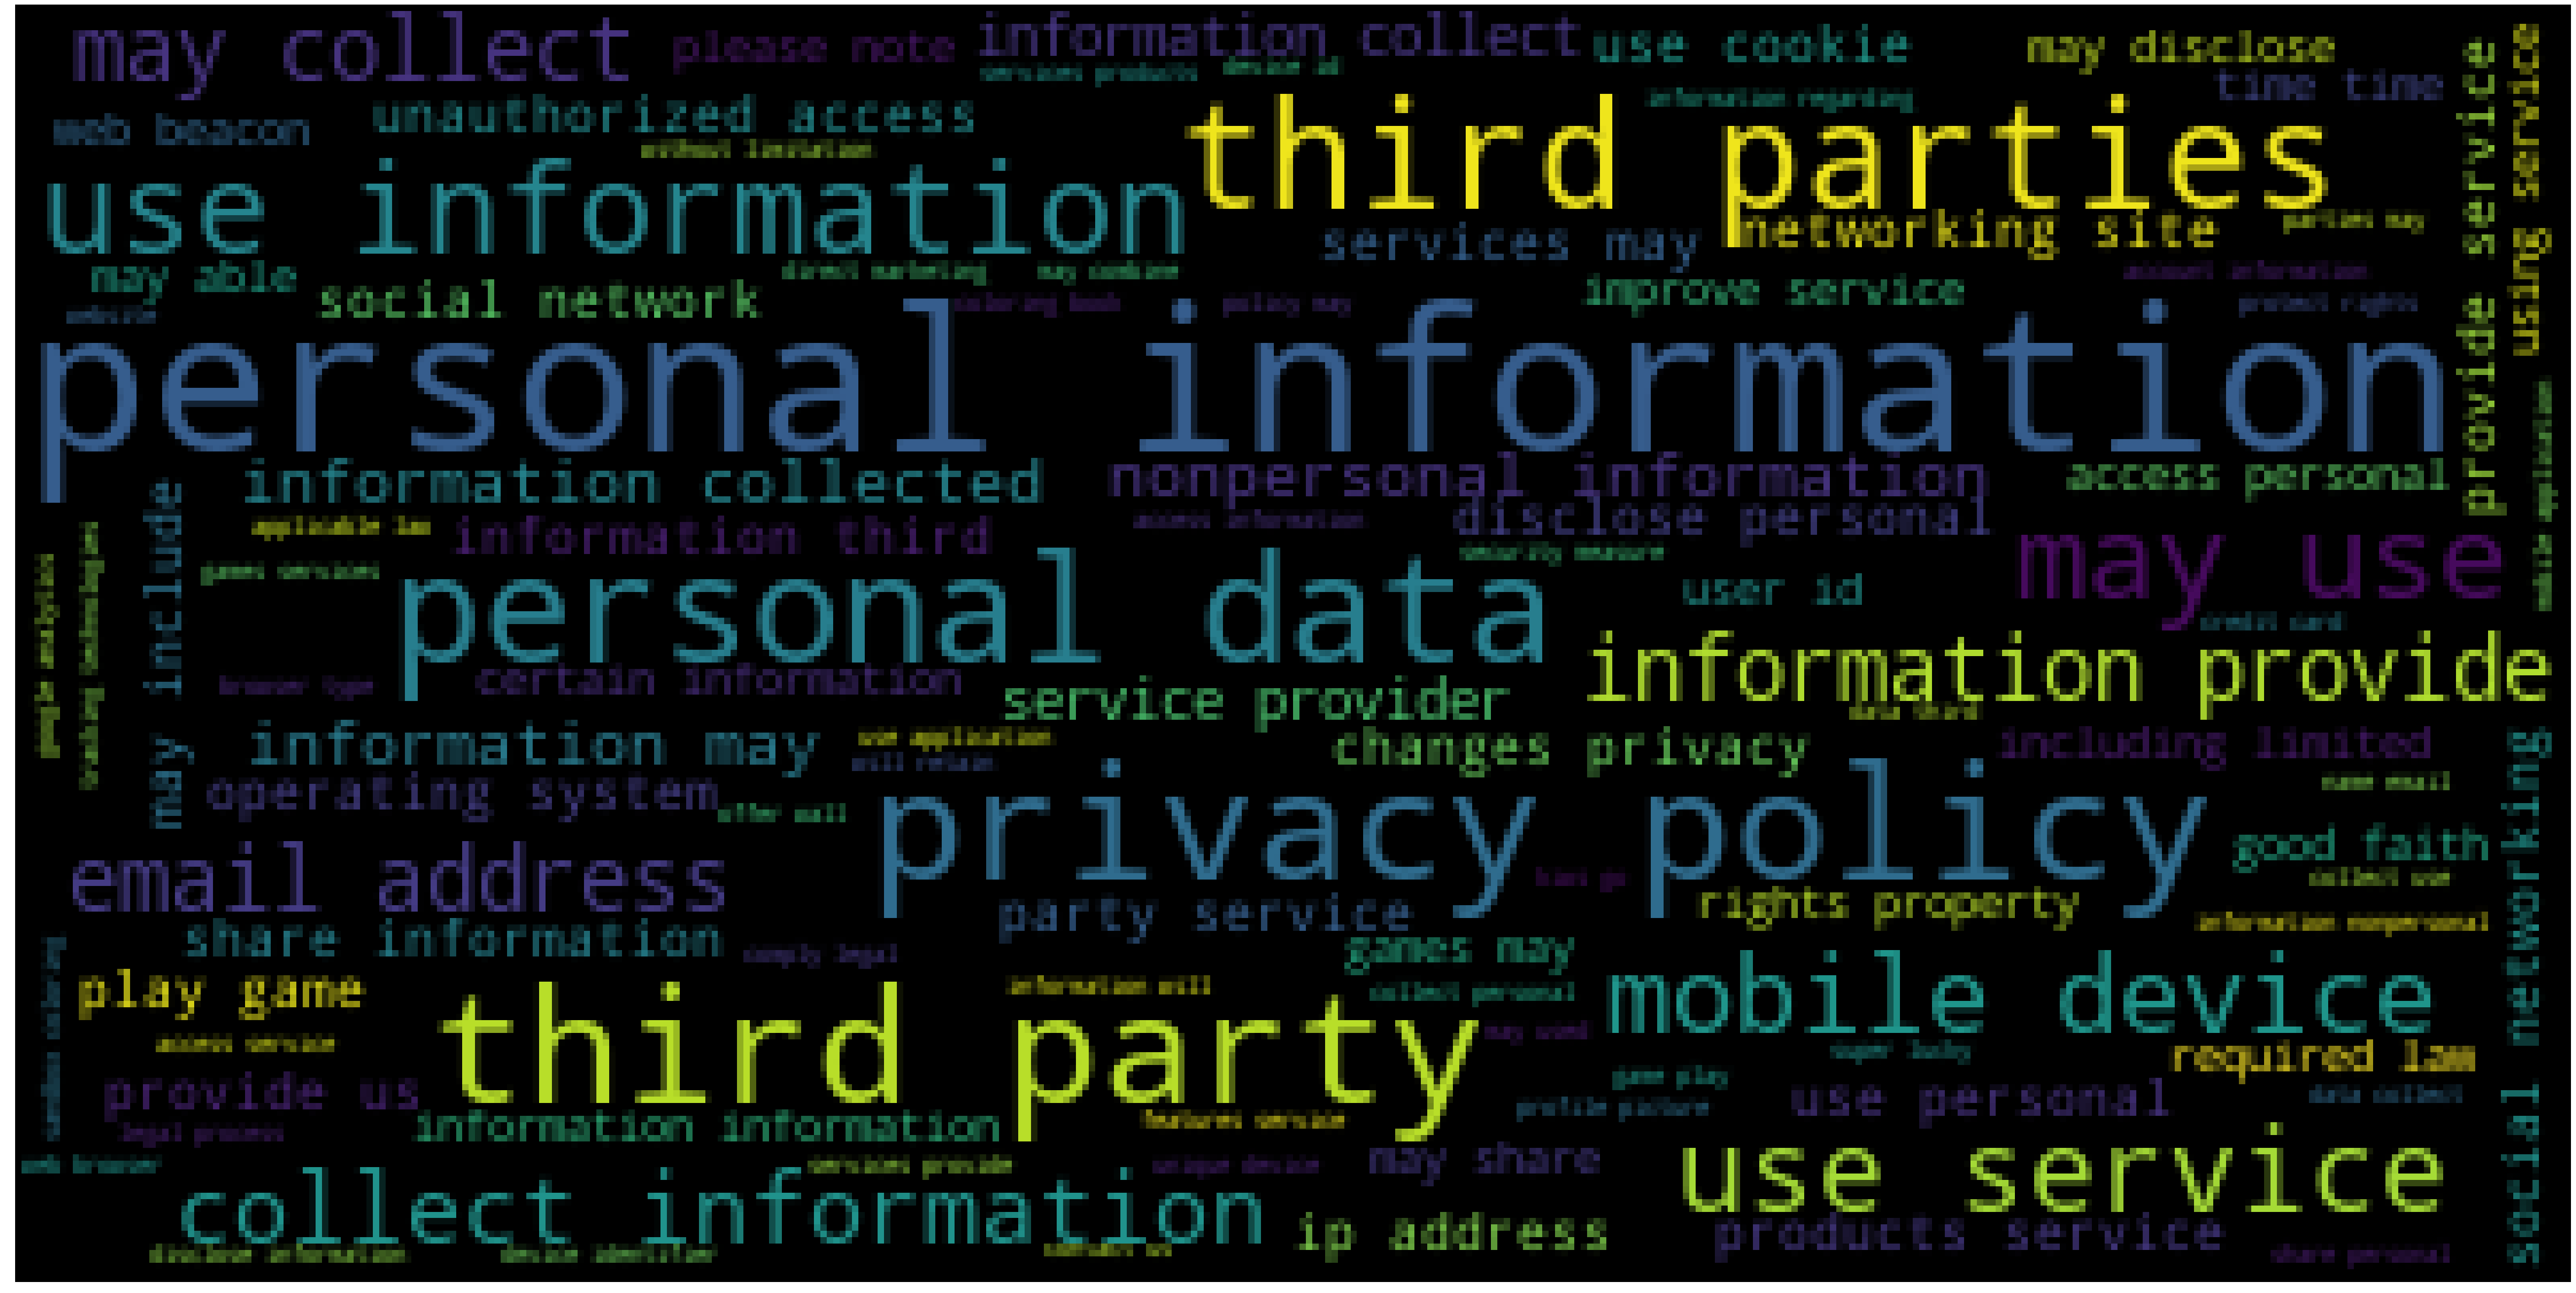

In [149]:
wc(false_postive,'black','Common Words' )

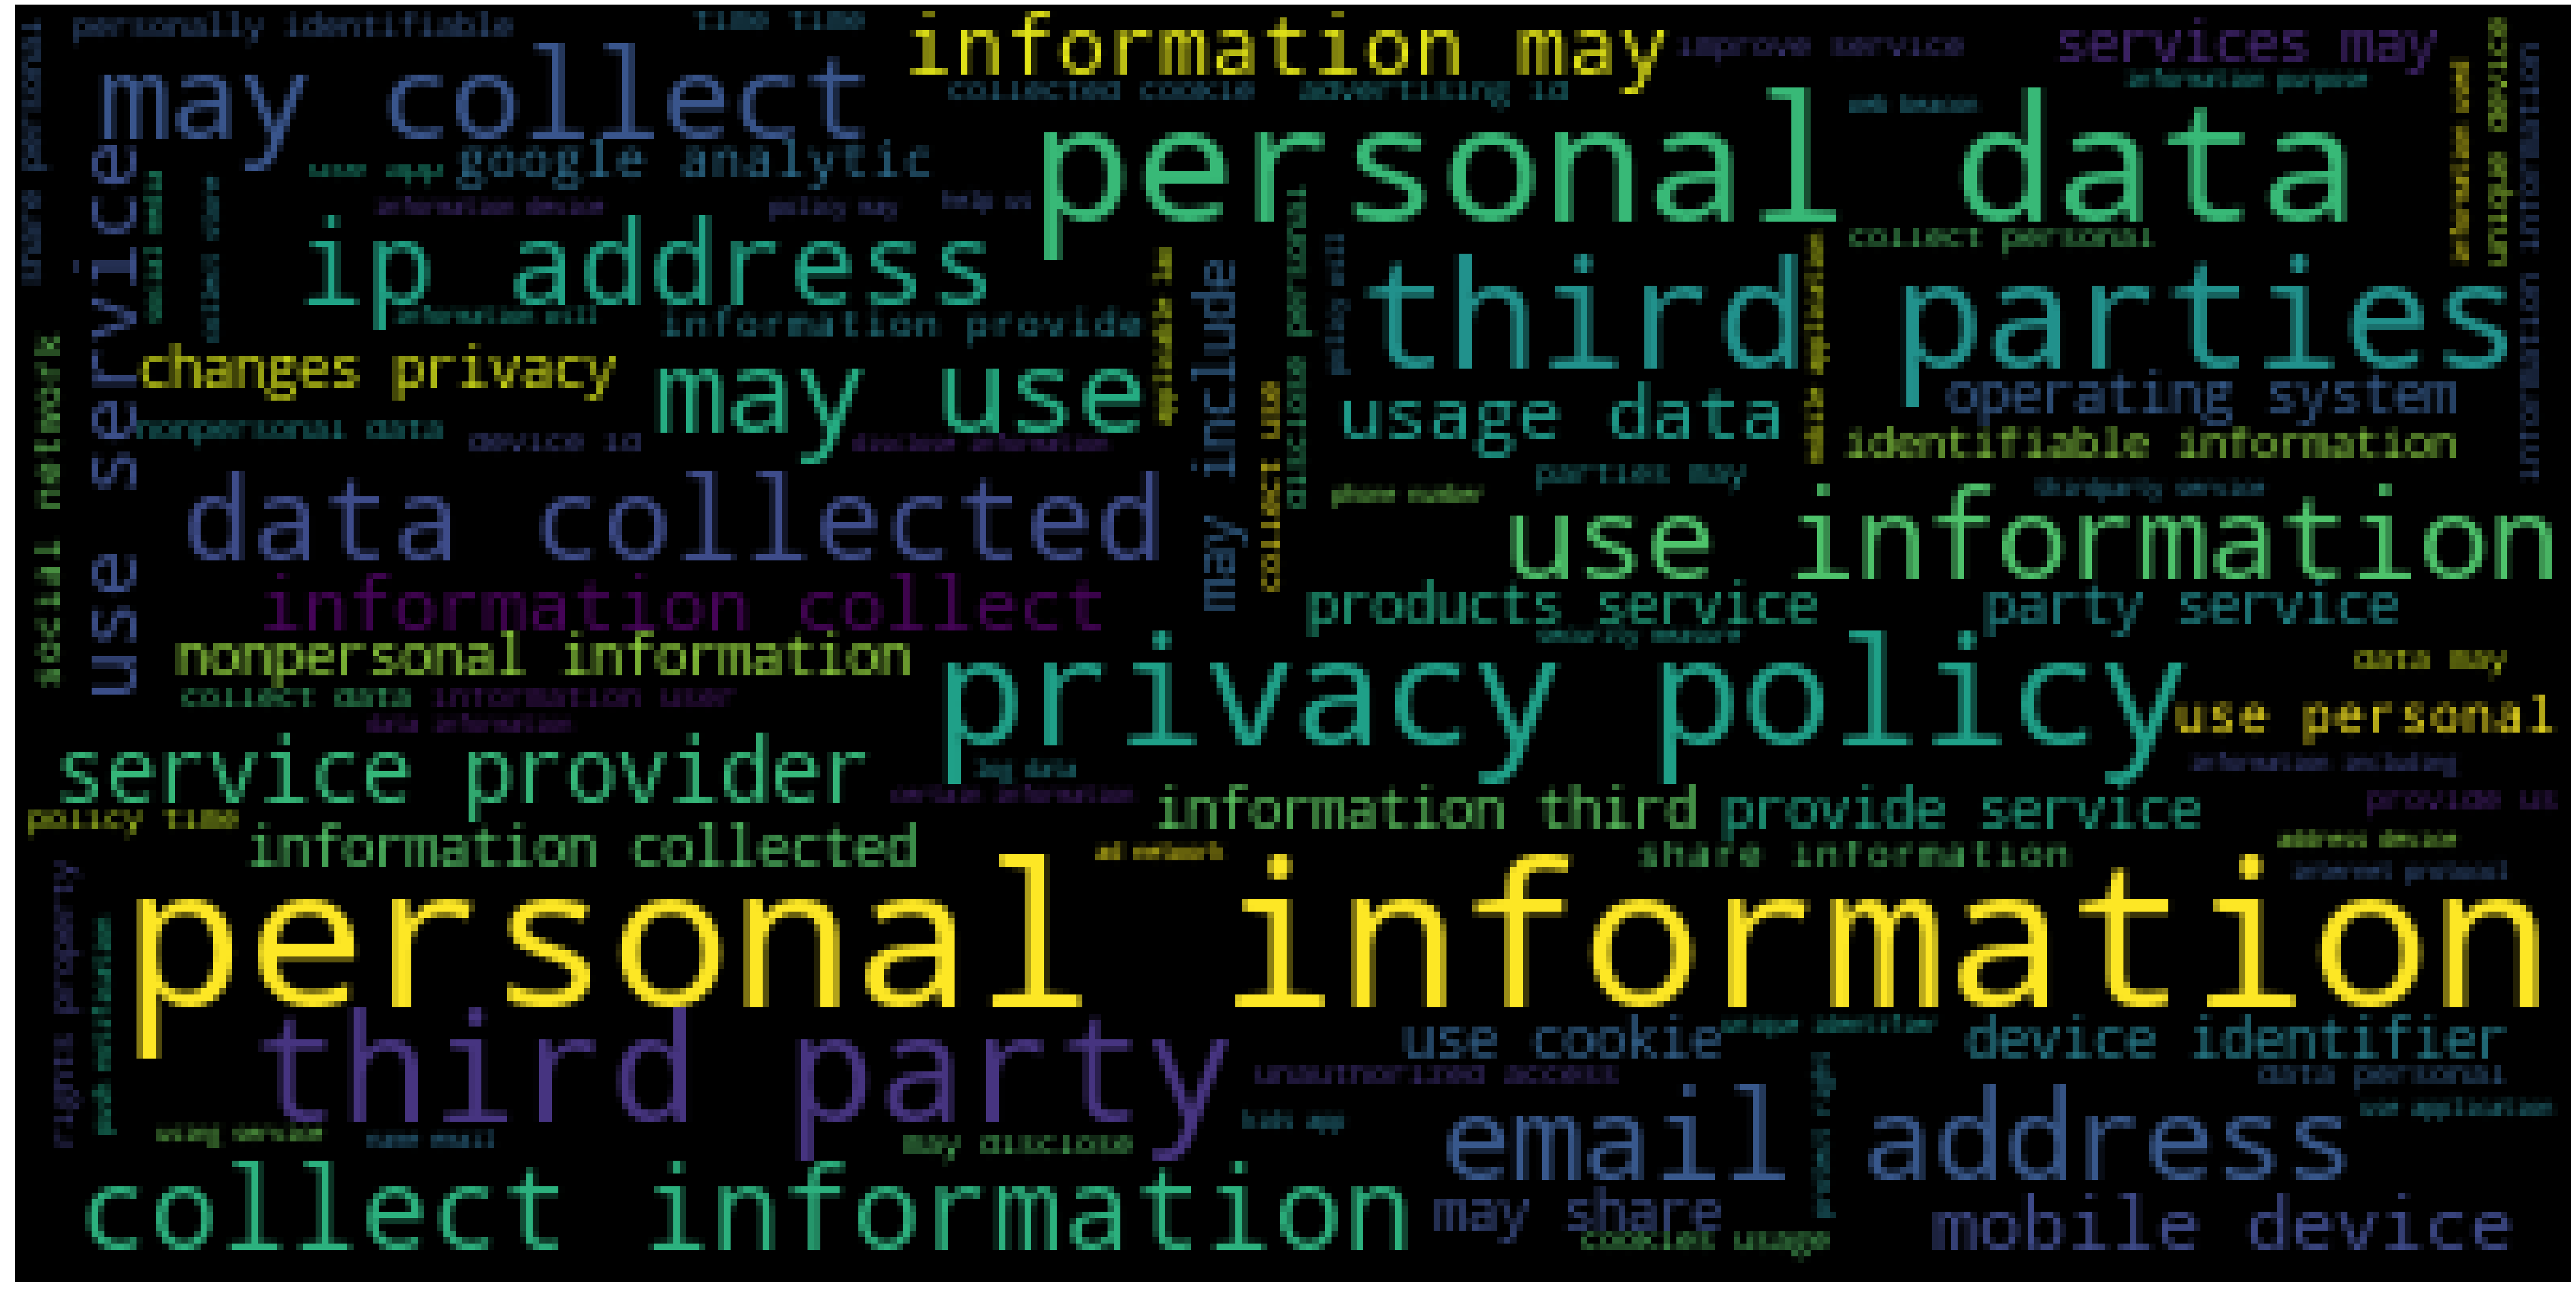

In [152]:
wc(true_negative,'black','Common Words' )

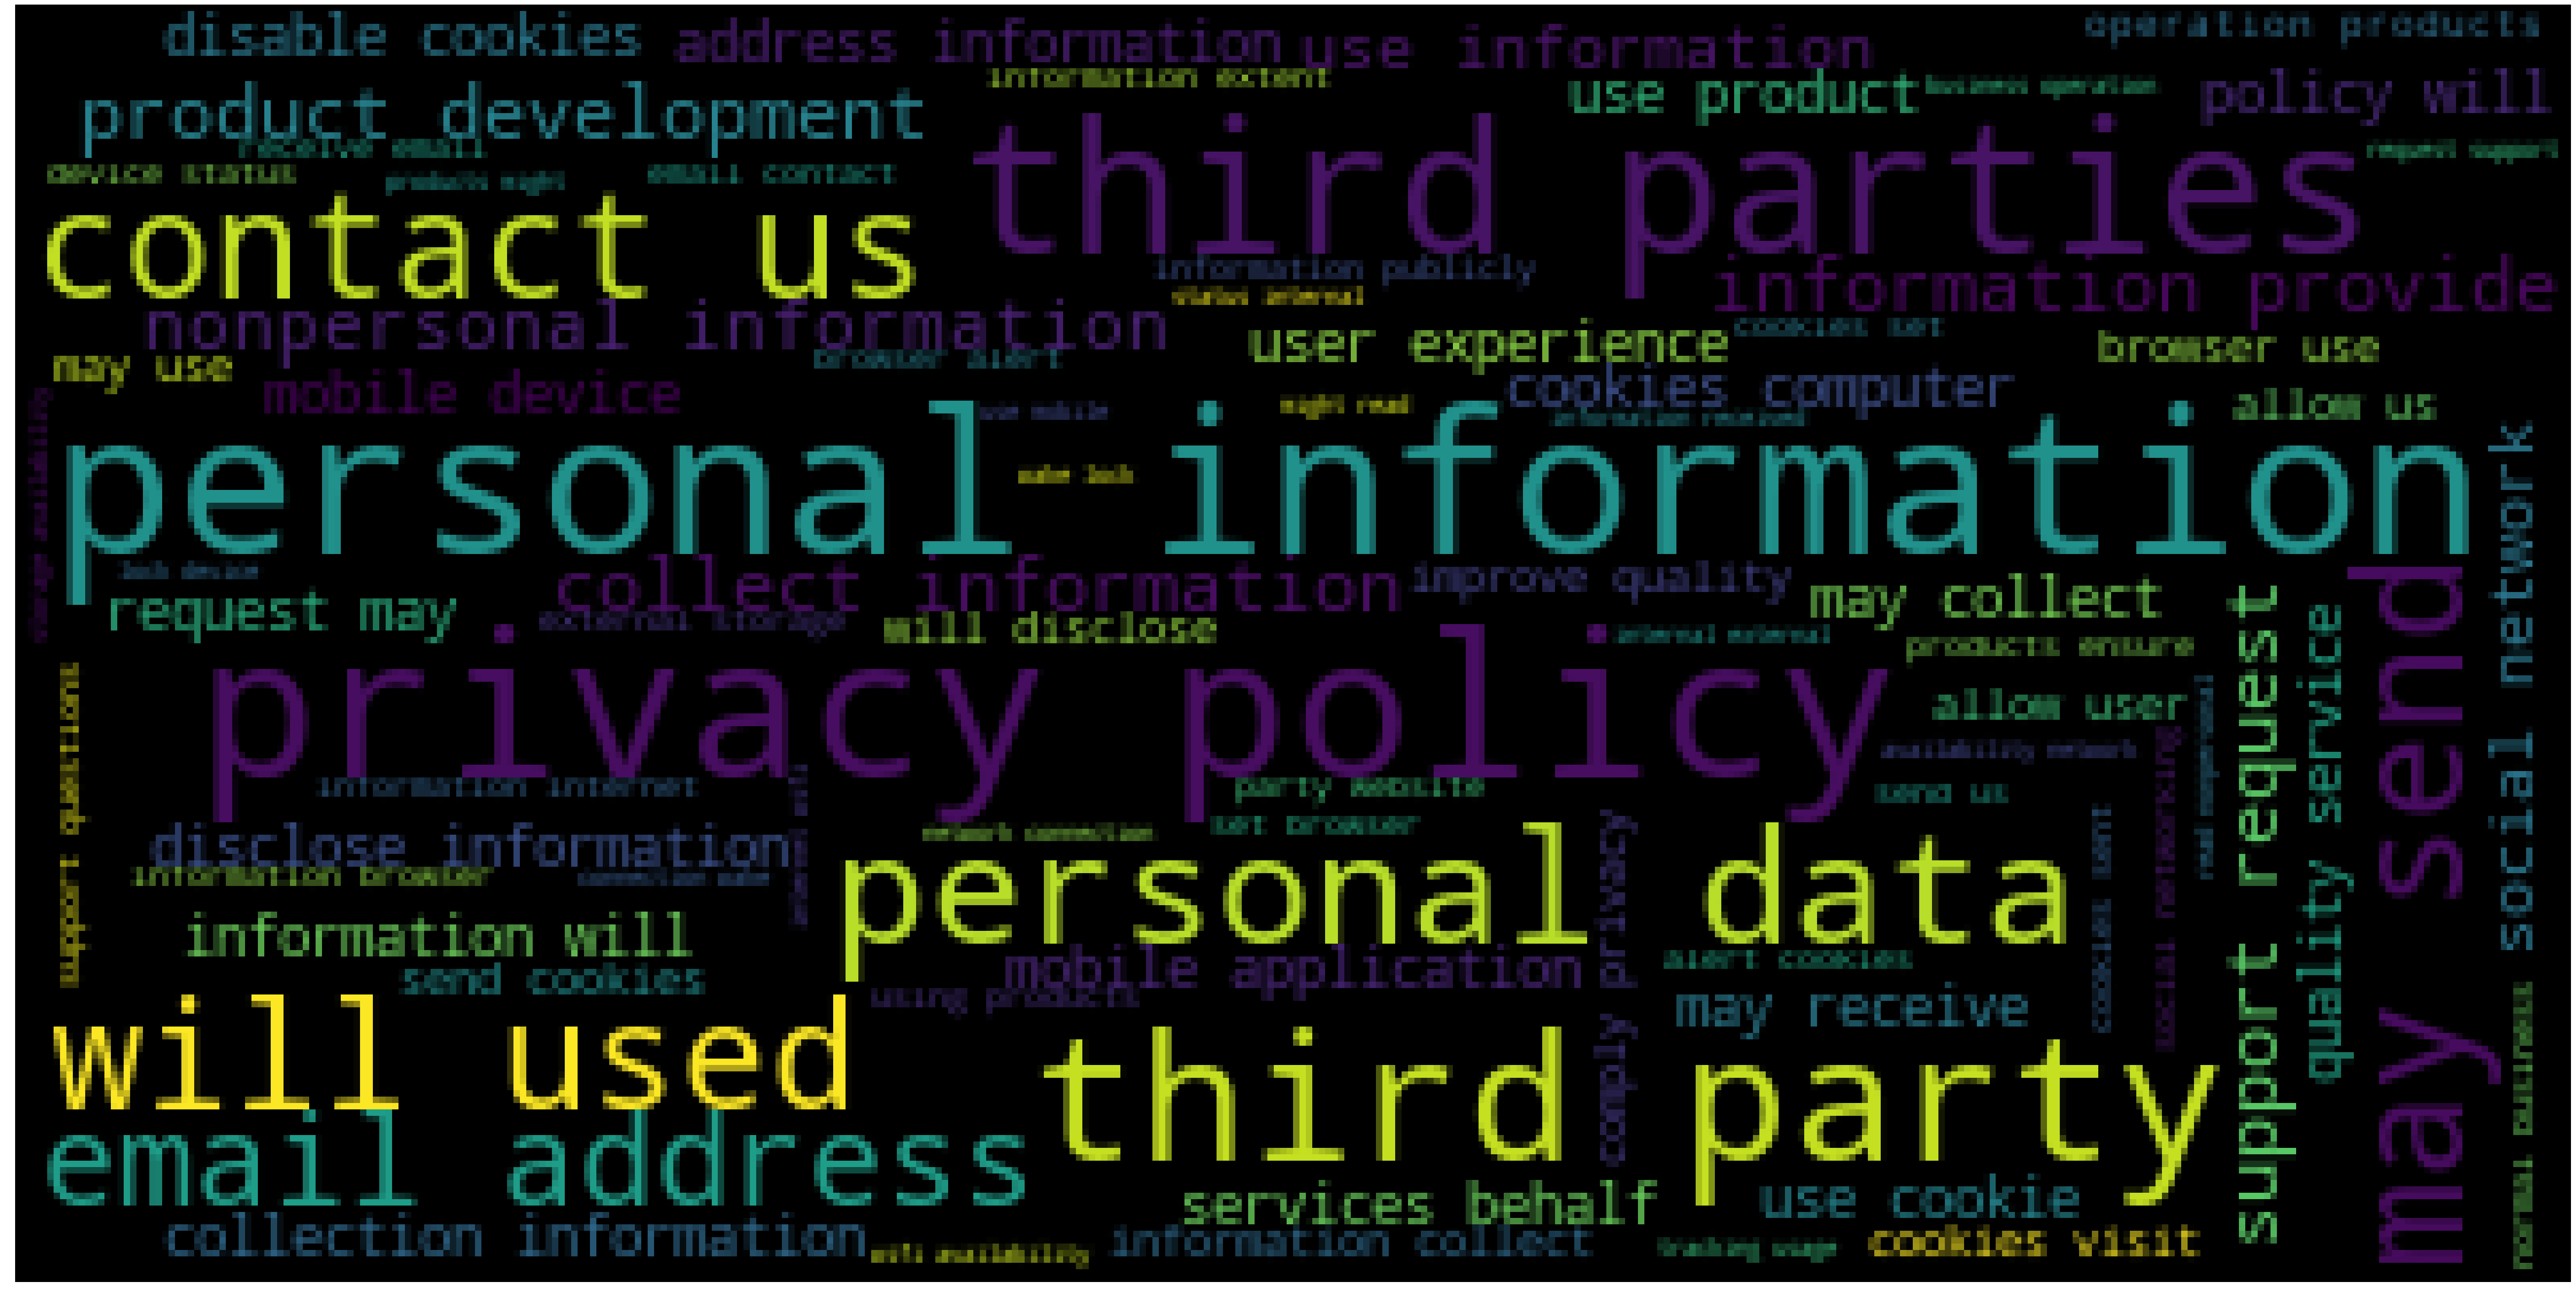

In [151]:
wc(true_postive,'black','Common Words' )